In [1]:
%matplotlib inline
from keras.datasets import imdb
from keras import models, layers, optimizers, losses, metrics
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [2]:
(train_data,train_labels), (test_data,test_labels) = imdb.load_data(num_words=10000)

In [3]:
print(train_data.shape)
print(train_labels.shape)
print(train_data[0])
print(train_labels[0])

print(test_data.shape)
print(test_labels.shape)

print(test_data[0])
print(test_labels[0])

(25000,)
(25000,)
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1
(25000,)
(25000,)
[1, 591, 202, 14, 31, 

In [4]:
print(len(train_data[1])) #input length are not the same
print(len(train_data[2]))
print(type(train_data[2]))

189
141
<class 'list'>


In [5]:
word_index = imdb.get_word_index()

In [6]:
reverse_word_index=dict([(value,key) for key, value in word_index.items()])
sample_index = 1
decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[sample_index]])
print(decoded_review)
print(train_labels[sample_index])

? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then
0


In [7]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [8]:
print(x_train[0])
print(y_train[0])

print(x_train.shape)

[0. 1. 1. ... 0. 0. 0.]
1.0
(25000, 10000)


In [9]:
x_val = x_train[:10000]
partial_x_train=x_train[10000:]

y_val = y_train[:10000]
partial_y_train=y_train[10000:]

In [10]:
print(x_val.shape, partial_x_train.shape)

(10000, 10000) (15000, 10000)


In [11]:
model = models.Sequential()


model.add(layers.Dense(units=16, activation="tanh", input_shape=(10000,)))
model.add(layers.Dense(units=16, activation="tanh", input_shape=(10000,)))
# model.add(layers.Dense(units=16, activation="relu"))
model.add(layers.Dense(units=1, activation="sigmoid"))

model.summary()

# model.compile(optimizer=optimizers.RMSprop(lr=0.0001),
#               loss= losses.binary_crossentropy,
#               metrics=[metrics.binary_accuracy]
#              )

model.compile(optimizer="rmsprop",
              loss= "mse",
              metrics=["accuracy"]
             )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model.fit(
    partial_x_train, partial_y_train,
    epochs=8,
    batch_size=1500,
    validation_data=(x_val,y_val)
)

Train on 15000 samples, validate on 10000 samples
Epoch 1/8
15000/15000 [==============================] - 2s 157us/step - loss: 0.1975 - acc: 0.7127 - val_loss: 0.1620 - val_acc: 0.8055
Epoch 2/8
15000/15000 [==============================] - 1s 94us/step - loss: 0.1293 - acc: 0.8630 - val_loss: 0.1229 - val_acc: 0.8603
Epoch 3/8
15000/15000 [==============================] - 1s 98us/step - loss: 0.0977 - acc: 0.9003 - val_loss: 0.1124 - val_acc: 0.8587
Epoch 4/8
15000/15000 [==============================] - 1s 93us/step - loss: 0.0792 - acc: 0.9193 - val_loss: 0.0980 - val_acc: 0.8747
Epoch 5/8
15000/15000 [==============================] - 1s 94us/step - loss: 0.0649 - acc: 0.9325 - val_loss: 0.0898 - val_acc: 0.8833
Epoch 6/8
15000/15000 [==============================] - 1s 93us/step - loss: 0.0543 - acc: 0.9447 - val_loss: 0.0906 - val_acc: 0.8779
Epoch 7/8
15000/15000 [==============================] - 1s 96us/step - loss: 0.0478 - acc: 0.9505 - val_loss: 0.0882 - val_acc: 0.87

In [13]:
print(history.history)

{'val_loss': [0.16200511008501053, 0.12291017584502698, 0.11236099973320961, 0.09801457785069942, 0.08983759172260761, 0.09061531014740468, 0.08817539215087891, 0.0839708037674427], 'val_acc': [0.8054999947547913, 0.8602999925613404, 0.8587000072002411, 0.8747000068426132, 0.8833000034093856, 0.8779000163078308, 0.879799997806549, 0.8855000019073487], 'loss': [0.19751893132925033, 0.12934088632464408, 0.09769122377038002, 0.07916791886091232, 0.06490117274224758, 0.05428665801882744, 0.04781683683395386, 0.036831431463360785], 'acc': [0.7126666694879532, 0.8629999995231629, 0.9003333330154419, 0.9193333327770233, 0.9324666619300842, 0.9446666657924652, 0.9505333483219147, 0.9648000001907349]}


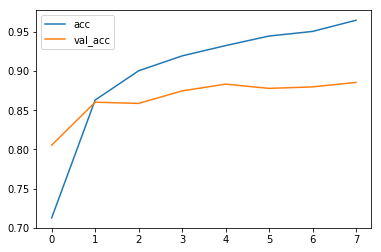

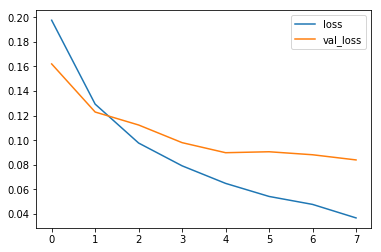

In [14]:
def plot_history(history):
    plt.plot(history["acc"], label="acc")
    plt.plot(history["val_acc"], label="val_acc")
    plt.legend()
    plt.show()
    plt.close()
    
    plt.plot(history["loss"], label="loss")
    plt.plot(history["val_loss"], label="val_loss")
    plt.legend()
    plt.show()
    plt.close()

plot_history(history.history)

In [15]:
test_loss, test_acc = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 83us/step


In [16]:
print(test_loss, test_acc)

0.09066421217679978 0.8776
